<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/The_colorful_rainbow_of_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noise can be differentiate by its color, awesome!!

https://en.wikipedia.org/wiki/Colors_of_noise

# White and brown noise

Formula to creating white noise:

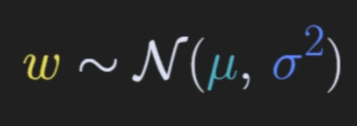

White noise is generated by randomly sampling from a Gaussian normal distribution, with some mean value and some variance or standard deviation. 

Formula to generate brown noise:

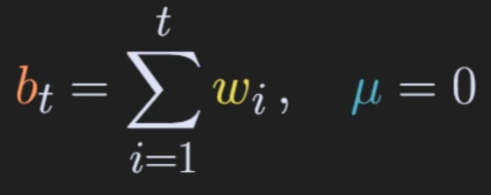

After white noise is created, brownian noise can be created through what's called cumulative sum of the white noise (e.g., the tenth point of brownian noise is the sum of the white noise over the first 10 data points)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

npnts = int(1e5) # 1 . 10^5
npnts

100000

In [40]:
white_noise = np.random.randn(npnts)
brown_noise = np.cumsum(white_noise)
white_noise

array([-1.8315273 ,  0.15203065,  0.40628813, ...,  1.18319711,
       -0.15898729, -1.52551004])

In [41]:
brown_noise

array([-1.8315273 , -1.67949665, -1.27320852, ..., 76.73284555,
       76.57385826, 75.04834822])

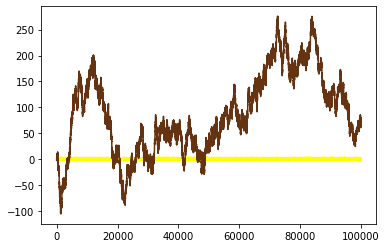

In [42]:
plt.plot(white_noise, color=[1, 1, 0]) # color = 100% RED, 100% GREEN, 0% BLUE
plt.plot(brown_noise, color=[.4, .2, .07]) # brown
plt.show()

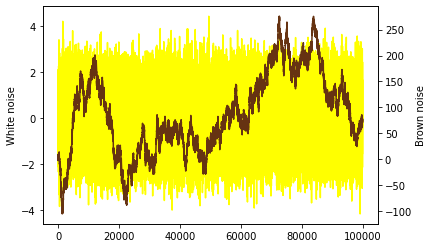

In [43]:
fig, ax = plt.subplots(1)
ax.plot(white_noise, color=[1, 1, 0])
ax.set_ylabel('White noise')
ax2 = ax.twinx() # they are going to share the X-axis (and going to have their own unique Y-axis)
ax2.plot(brown_noise, color=[.4, .2, .07])
ax2.set_ylabel('Brown noise')
plt.show()

In [44]:
# Let's generate the power spectrum

# Taking Fourier transform of these signals
white_noise_X = np.abs(fftpack.fft(white_noise)) # "X" means "spectral"
white_noise_X = white_noise_X / npnts # normalizing, dividing by the number of points
white_noise_X

array([0.00075048, 0.00176393, 0.00215061, ..., 0.00381082, 0.00215061,
       0.00176393])

In [45]:
brown_noise_X = np.abs(fftpack.fft(brown_noise))
brown_noise_X = brown_noise_X / npnts
brown_noise_X

array([87.62156938, 39.28513776, 15.44664715, ..., 16.6555332 ,
       15.44664715, 39.28513776])

In [46]:
# Vector of frequencies
frex = np.linspace(0, 1, int(npnts / 2 + 1))
frex

array([0.0000e+00, 2.0000e-05, 4.0000e-05, ..., 9.9996e-01, 9.9998e-01,
       1.0000e+00])

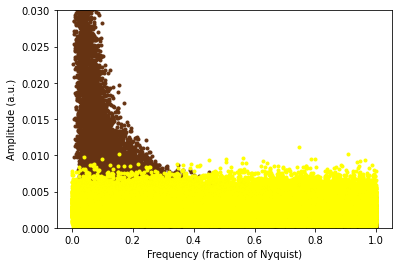

In [47]:
plt.plot(frex, brown_noise_X[:len(frex)], '.', color=[.4, .2, .07])
plt.plot(frex, white_noise_X[:len(frex)], '.', color=[1, 1, 0])
plt.ylim([0, .03])
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

# Pink and blue noise

Pink noise looks a lot like white noise. It's just randomic data points in Time domain. But in frequency, looks like something between white and brownian noise.

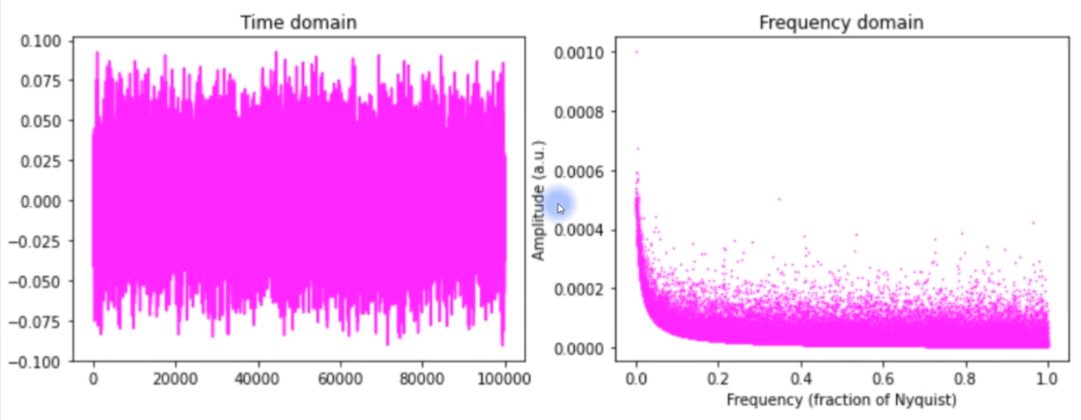

And then we have blue noise, similar in Time domain, but in Frequency domain the signal goes up.

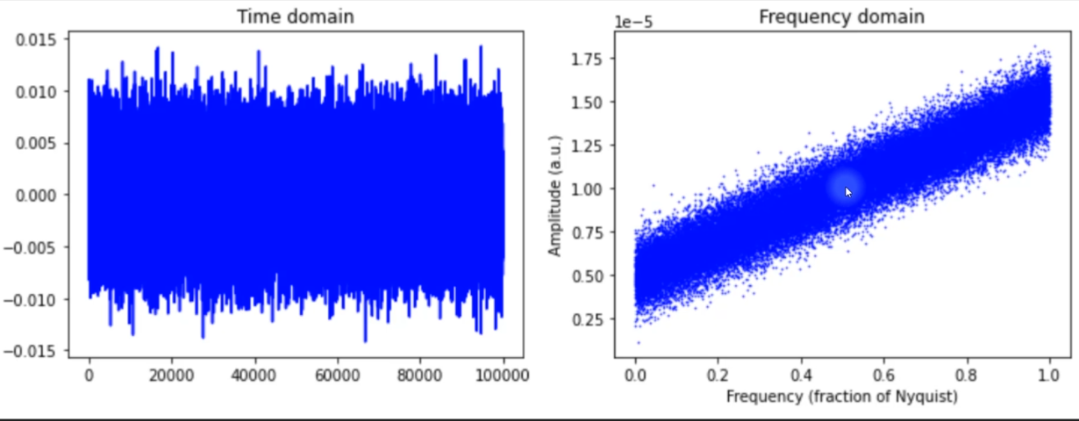

White noise and brown noise are easier to define in Time domain. 

In contrast, pink and blue noise are easier to define in the Frequency domain, and then you take the inverse Fourier transform to get back to time domain.

Formula to creating pink noise:

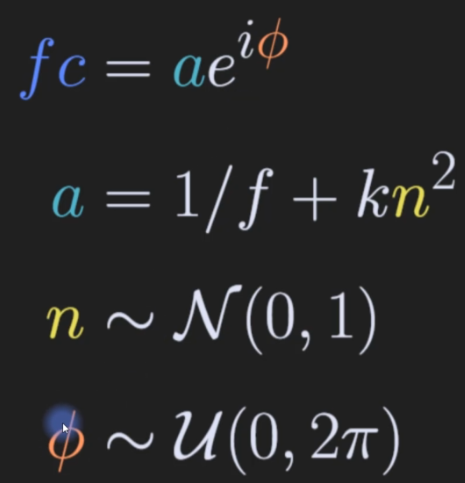

In [48]:
# pink noise

fc_amp = 1 / (frex + .01) + np.random.randn(int(npnts / 2 + 1)) ** 2 * 5 
fc_phs = 2 * np.pi * np.random.randn(int(npnts / 2 + 1))

FourierSpect = np.zeros(npnts, dtype=complex)
FourierSpect[:int(npnts / 2 + 1)] = fc_amp * np.exp(1j * fc_phs) # 1j = square root of -1

In [49]:
FourierSpect 

array([-94.11870413-69.22222383j, -44.15536416+96.39872524j,
       -80.54579164-58.79343322j, ...,   0.         +0.j        ,
         0.         +0.j        ,   0.         +0.j        ])

In [50]:
pink_noise = np.real(fftpack.ifft(FourierSpect))
pink_noise

array([-0.00278729,  0.01244818, -0.01271179, ...,  0.01350689,
       -0.00364624, -0.00681015])

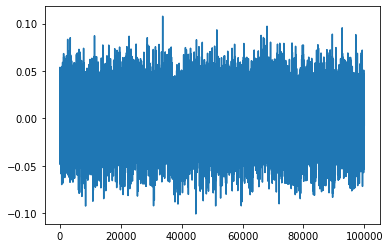

In [51]:
plt.plot(pink_noise)

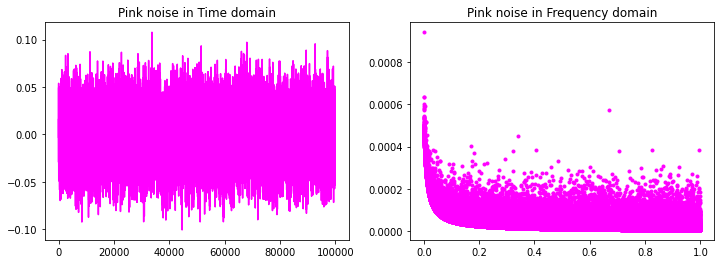

In [52]:
pink_noise_X = np.abs(fftpack.fft(pink_noise)) / npnts

fig, ax = plt.subplots(1, 2, figsize=[12, 4])
ax[0].plot(pink_noise, color=[1, 0, 1])
ax[0].set_title('Pink noise in Time domain')

ax[1].plot(frex, pink_noise_X[:len(frex)], '.', color=[1, 0, 1])
ax[1].set_title('Pink noise in Frequency domain')

plt.show()

In [53]:
# blue noise

fc_amp = np.linspace(1, 3, int(npnts / 2 + 1)) + np.random.randn(int(npnts / 2 + 1)) ** 2 / 5 
fc_phs = 2 * np.pi * np.random.randn(int(npnts / 2 + 1))

FourierSpect = np.zeros(npnts, dtype=complex)
FourierSpect[:int(npnts / 2 + 1)] = fc_amp * np.exp(1j * fc_phs) # 1j = square root of -1

blue_noise = np.real(fftpack.ifft(FourierSpect))
blue_noise

array([ 0.00037755, -0.00320228, -0.00487464, ..., -0.00224751,
       -0.00173128,  0.00068475])

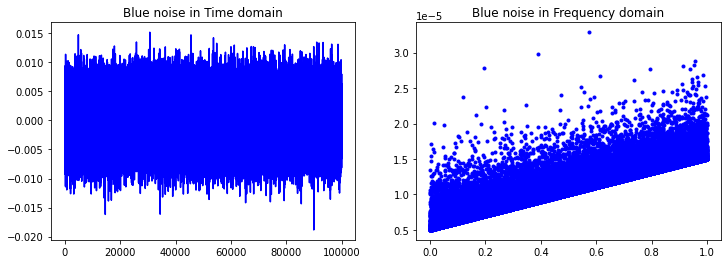

In [54]:
blue_noise_X = np.abs(fftpack.fft(blue_noise)) / npnts

fig, ax = plt.subplots(1, 2, figsize=[12, 4])
ax[0].plot(blue_noise, color=[0, 0, 1])
ax[0].set_title('Blue noise in Time domain')

ax[1].plot(frex, blue_noise_X[:len(frex)], '.', color=[0, 0, 1])
ax[1].set_title('Blue noise in Frequency domain')

plt.show()

# The colorful spectrum of the rainbow

The idea here is, based on all noises we've seen previous, to create a "colorful spectrum", of the spectrum of colorful noise in the Frequency domain.

In [55]:
import numpy as np
import scipy.fftpack as fftpack

def white_noise_spectrum(amplitude):
  npnts = int(1e5) # 1 . 10^5
  noise = amplitude * np.random.randn(npnts)
  return abs(fftpack.fft(noise) / npnts)

def brown_noise_spectrum(amplitude):
  npnts = int(1e5) # 1 . 10^5
  noise = np.cumsum(amplitude * np.random.randn(npnts))
  return abs(fftpack.fft(noise) / npnts)

def pink_noise_spectrum(amplitude):
  npnts = int(1e5) # 1 . 10^5
  FourierSpect = np.zeros(npnts, dtype=complex)
  fc_amp = 1 / (frex + .01) + np.random.randn(int(npnts / 2+1)) **2*5
  fc_phs = 2 * np.pi * np.random.rand(int(npnts / 2+1))
  FourierSpect[:int(npnts / 2+1)] = fc_amp * np.exp(1j * fc_phs)
  noise = amplitude * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise) / npnts)

def blue_noise_spectrum(amplitude):
  npnts = int(1e5) # 1 . 10^5
  FourierSpect = np.zeros(npnts, dtype=complex)
  fc_amp = np.linspace(1, 3, int(npnts / 2+1)) + np.random.randn(int(npnts / 2+1)) ** 2 / 5 
  fc_phs = 2 * np.pi * np.random.rand(int(npnts / 2+1))
  FourierSpect[:int(npnts / 2+1)] = fc_amp * np.exp(1j * fc_phs)
  noise = amplitude * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise) / npnts)


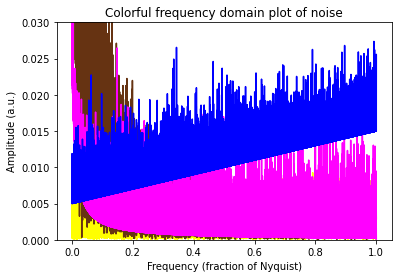

In [56]:
import matplotlib.pyplot as plt

frex = np.linspace(0, 1, int(npnts / 2 + 1))
plt.plot(frex, white_noise_spectrum(1)[:len(frex)], color=[1, 1, 0])
plt.plot(frex, brown_noise_spectrum(1)[:len(frex)], color=[.4, .2, .07])
plt.plot(frex, pink_noise_spectrum(50)[:len(frex)], color=[1, 0, 1])
plt.plot(frex, blue_noise_spectrum(1000)[:len(frex)], color=[0, 0, 1])
plt.ylim([0, .03])
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Colorful frequency domain plot of noise')
plt.show()

In [57]:
blue_noise_spectrum(1000)

array([0.00379333, 0.00527125, 0.00503118, ..., 0.00545991, 0.00503118,
       0.00527125])

# How do these different noises sound?

In [58]:
from IPython.display import Audio

print('White noise')
Audio(white_noise, rate=44100)

White noise


In [59]:
print('Brown noise')
Audio(brown_noise, rate=44100)

Brown noise


In [61]:
print('Pink noise')
Audio(pink_noise, rate=44100)

Pink noise


In [62]:
print('Blue noise')
Audio(blue_noise, rate=44100)

Blue noise
